# P7 Machine Learning - Linear Regression 
Brittany Dowdle   06/09/2024

### [GitHub Link](https://github.com/Bdowdle4/datafun-07-ml)

---

## Import Dependencies *(At the Top, After the Introduction)*
Follow conventional package import organization and alias.
Import each package just once near the top of the file.
Be sure you have **INSTALLED** any external packages *(outside the Python Standard Library)* into your active project virtual environment first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


---

## 1 Chart a Straight Line
Plot the fahrenheit and celcius temperatures to visualize the relationsihp between the two variables.

Define variable 'c' as a lambda function that converts fahrenheit to celsius. Create a list of tuples to plot.

In [2]:
# c is celsius and f is fahrenheit
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0, 101, 10)] 

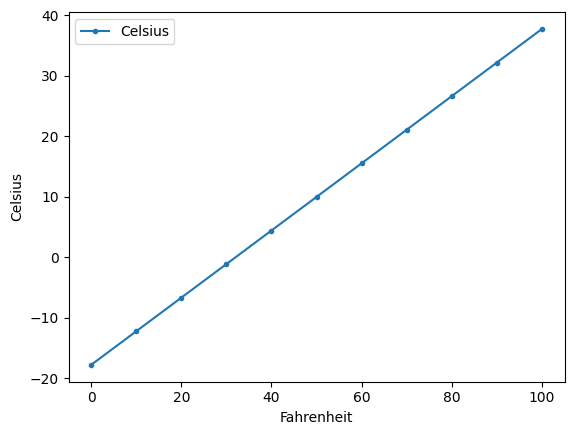

In [3]:
# create the dataframe
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
# plot the data
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
# title for y-axis
y_label = axes.set_ylabel('Celsius')

---

## 2  Predict Avg High Temp in NYC in January

+ Data acquisition, inspection, cleaning, and descriptive statistics.
+ Build the model, predict, and visualizations.

### Data Acqusition
Load the data into a suitable structure for analysis, typically a DataFrame when working with Python. Use the nyc csv file.

In [4]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Data Inspection
Display the first 5 and last 5 rows of the DataFrame, check the shape, and display the data types of each column. This step is crucial for getting familiar with the dataset's format, size, and the type of information each column holds.

In [5]:
print(nyc_df.head())
print(nyc_df.tail())
print(nyc_df.shape)
print(nyc_df.dtypes)

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3
(124, 3)
Date         int64
Value      float64
Anomaly    float64
dtype: object


### Data Cleaning
**It’s always wise to hold onto your original data.** Bad data values and missing values can significantly impact data analysis.

Improve the column names and clean up the date series. 

In [6]:
# Change "value" column name to "Temperature" 
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [7]:
# Remove month from "Date" since it is on every data point.
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each numerical column. This provides insights into the distribution and central tendencies of the data, which can be crucial for identifying patterns, anomalies, or data integrity issues.

In [8]:
# Set precision for descriptive statistics
pd.set_option('display.precision', 2)
print(nyc_df.Temperature.describe())

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


### Build the Model
Forecasting future January average high temperatures.
Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

The simple linear regression equation is **y = mx + b**  where:

• m is the line’s **slope**,

• b is the line’s **intercept** with the y-axis (at x = 0),

• x is the independent variable (the **date** in this example), and

• y is the dependent variable (the **temperature** in this example)

In [9]:
# Use stats from scipy to run linear regression on the data set
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

# slope
m = linear_regression.slope

# intercept
b = linear_regression.intercept

# show simple linear regression equation for this example
print(f'The linear regression equation is y = {m}x + {b}') 

The linear regression equation is y = 0.014771361132966163x + 8.694993233674289


### Predict
Using simple linear regression, we draw the best-fit line and use the line to extrapolate out to past and future values.

Use the linear regression model to predict the average high temperature in NYC for:
+ 1824
+ 2024

In [10]:
print(linear_regression.slope * 1824 + linear_regression.intercept)
print(linear_regression.slope * 2024 + linear_regression.intercept)

35.63795594020457
38.5922281667978


### Visualizations
We'll use Seaborn and Matplotlib to create visualizations of both our data - and our best-fit line. 
Plotting average high temperatures and a regression line, date on the x axis and the temperatures on the y-axis.

(10.0, 70.0)

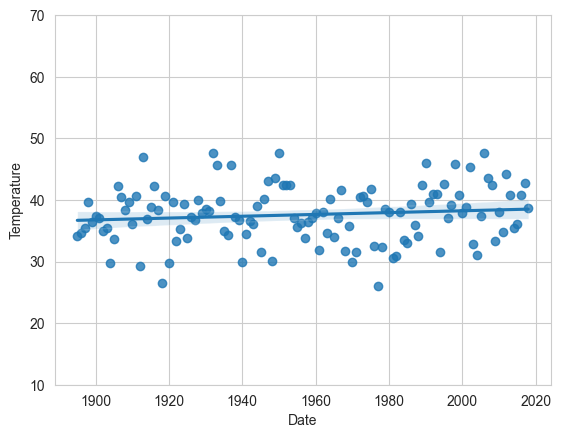

In [11]:
# choose how chart displays
sns.set_style('whitegrid')
# plot the data
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
# trim the axis
axes.set_ylim(10,70)

Text(0.5, 1.0, 'Average High Temperature in January in NYC')

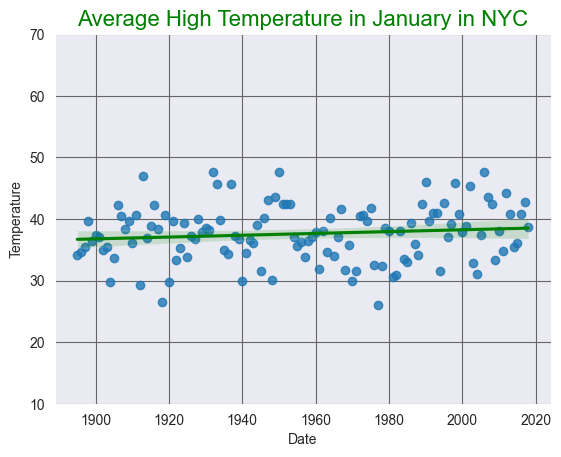

In [12]:
# customize chart
sns.set_style('darkgrid', {"grid.color": ".4", "grid.linestyle": "-"})
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, line_kws=dict(color='g'))
axes.set_ylim(10,70)
axes.set_title('Average High Temperature in January in NYC', size=16, color='green')

---

## 3 Training/Testing - Predict Avg High Temp in NYC in January
This time, we'll use scikit-learn estimator, and we'll practice splitting data for training (to build a model) and testing (testing our model against known values).
We can utilize the initial code from before (upload data, Change data, and change columns).

### Data Acquisition

In [13]:
# Initial data from part 2, using different name
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Data Inspection

In [14]:
print(df.head(3))
print(df.tail(3))
print(df.shape)
print(df.dtypes)

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
       Date  Value  Anomaly
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3
(124, 3)
Date         int64
Value      float64
Anomaly    float64
dtype: object


### Data Cleaning

In [15]:
# Change "value" column name to "Temperature" 
df.columns = ['Date', 'Temperature', 'Anomaly']

# Remove month from "Date" since it is on every data point.
df.Date = df.Date.floordiv(100)
df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Descriptive Statistics

In [16]:
df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


### Build the Model

In [17]:
# Split data into training and testing
x_train, x_test, y_train, y_test =train_test_split(df.Date.values.reshape(-1,1), df.Temperature.values, random_state=11)

# shape of training set
x_train.shape
print(x_train.shape)

# shape of testing set
x_test.shape
print(x_test.shape)

(93, 1)
(31, 1)


In [18]:
# Train the model using the training set
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

# slope of model
m = linear_regression.coef_

# intercept of model
b = linear_regression.intercept_

# show simple linear regression equation for this example
print(f'The linear regression equation is y = {m}x + {b}') 

The linear regression equation is y = [0.01939167]x + -0.30779820252656975


### Test the Model

In [19]:
# Predict the temperature using the testing set
predicted = linear_regression.predict(x_test)
expected = y_test

# show the predicted and expected values
for p, e in zip(predicted[::5], expected [::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predict

In [20]:
# Use your model to predict the "average high temp in Jan" for the year 1824 and 2024
# Predict Function
predict = (lambda x: linear_regression.coef_*x+
           linear_regression.intercept_)

print(predict(1824))
print(predict(2024))

[35.06261389]
[38.94094855]


### Visualizations

Text(0.5, 1.0, 'Average High Temperature in January in NYC')

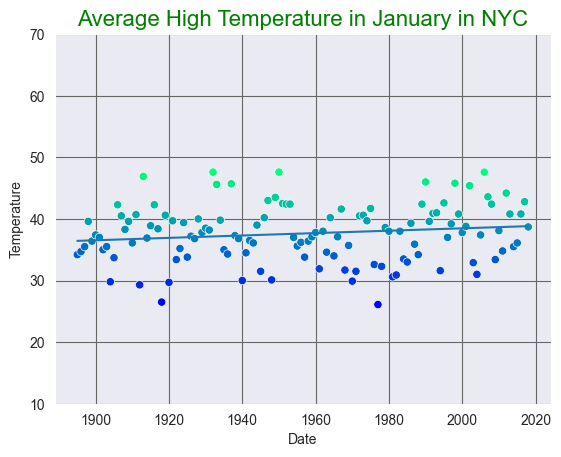

In [21]:
# Use Seaborn to generate a scatter plot with a best fit line.
# create scatterplot
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
# trim the axes
axes.set_ylim(10, 70)
# build array
x = np.array([min(df.Date.values), max(df.Date.values)])
# predict values for array
y = predict(x)
# add regression line
line = plt.plot(x, y)
# add title to chart
axes.set_title('Average High Temperature in January in NYC', size=16, color='green')

---

### 4 Add Your Insights 
**Compare the two methods.**

Using stats.linregress from the SciPy library and LinearRegression from the Scikit-Learn library. Both methods were applied to the same dataset. Some findings of each method are below:

+ SciPy is straightforward to use for simple linear regression and returns several useful statistics, including the slope, intercept, r-value, p-value, and standard error. It is ideal for quick and easy regression analysis. The simplicity of the output is beneficial for basic statistical analysis and understanding the relationship between variables.

+ Scikit-Learn provides a more comprehensive and flexible framework for building predictive models. The method is used by fitting the model to the data and then predicting or analyzing the results. This approach is more involved but offers greater flexibility for further analysis and model tuning. It allows for more advanced features such as cross-validation, model selection, and pipeline integration.

Both SciPy and Scikit-Learn provide reliable methods for performing simple linear regression. The choice between them depends on the specific needs of the analysis:

+ SciPy is better suited for quick, straightforward regression analysis with easy access to statistical details.

+ Scikit-Learn is more appropriate for comprehensive modeling tasks where additional features, flexibility, and integration with machine learning workflows are required.


>
>**Summary**
>
>The scatterplots created display the average high temperatures in January in New York City over a period from the late 1800s to around 2020. Here are the key observations:
>
>+ There is a slight upward trend in the average high temperatures over the years, as indicated by the regression line. >This suggests a gradual increase in January temperatures in NYC over the observed period. While the fit is not perfect due to the variability of the data, it provides a useful summary of the general direction of temperature changes.
>
>+ The temperatures range approximately from 20°F to 60°F. There appears to be a clustering of data points around the 30°F to 40°F range, indicating that these are the most common reported temperatures.
>
>Presenting results from both SciPy and Scikit-Learn methods allowed me to compare and contrast different analytical ..approaches. It demonstrates the consistency of findings across different statistical tools and provides a robust validation of the results. Visual representations are often more effective at communicating complex data insights than raw numbers. They make it easier for a broad audience, including those without a strong statistical background, to grasp the key findings and implications. Using the regression equation, the audience could make predictions about future temperatures. This can be useful for planning and decision-making in various sectors, such as agriculture, urban planning, and climate research. 
>

